<a href="https://colab.research.google.com/github/ArthurBVB/ProjetoAlura/blob/main/ProjetoImercaoAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de separação do lixo reciclavel

O projeto visa tentar automatizar a separação de lixos reciclaveis e não reciclaveis usando a inteligencia artificial da google,  reconhecendo o que é o objeto em questão e classificar ele como reciclavel ou não.


## Realizando a instalação das API's no colab

nesse passo realizamos a instalação das bibliotecas na qual precisamos, seguindo a orientação da documentação da google.

In [ ]:
!pip install -q -U google-generativeai
!pip install pathlib

## importando os modelos

Agora precisamos fazer uma chamada dos modelos que iremos ultilizar nesse projeto, nessa etapa preferi separar apenas os comandos de importação das bibliotecas.

In [ ]:
import pathlib
import textwrap
import PIL.Image
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

## Realizando mais configurações

Aqui realizamos algumas configurações a mais do nosso projeto, essa configuração é apenas para ajustar o makrdown do modelo.

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Passando o token de acesso

Nessa etapa precisamos passar o Token de acesso da API, essa parte em especifico por motivos de segurança irei retirar o campo da autenticação da API.

Porem caso queira rodar o modelo e ver como esta funcionando voce precisa criar um token no AI.Studio e passar aqui no campo destinado ao preenchimento dela.

In [ ]:

# fazendo a conexão com token de acesso da API
GOOGLE_API_KEY=('COLOQUE AQUI SEU TOKEN')
genai.configure(api_key=GOOGLE_API_KEY)

### Criando o modelo

Aqui fica todo o codigo responsavel pelo modelo , resolvi deixar a interação do usuario, para  o mesmo indicar qual seria o nome e o formato do arquivo, mas o projeto teria intenção de conectar a uma camera instalada em uma lixeira, por exemplo,  a entrada dessa imagem seria a foto tirada pela camera.

Pensando em melhorar os centros de coleta pensei em anexar um video de uma camera  que filma uma esteira de lixo e IA identificar o que lixo reciclavel do que nao é , porem como esse modelo esta lendo apenas imagens eu preciso transaformar cada frame do video em um imagem para a IA reconhecer e passar para ela , porem essa ideia fiquei devendo pois alem de precisar de um tempinho a mais, eu preciso de um pouco mais de estudo na area para desenvolver algo assim.

In [ ]:
# puxando a imagem de acordo com o nome colocado na entrada de dados
img = PIL.Image.open(input('Digite o nome do arquivo da imagem e seu respctivo formato (.png,.jpg,.jpeg)'))
#passando o modelo
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)
#fazendo o modelo responder uma pergunta ja definida, assim ele poderia ter uma responsa sim ou nao por exemplo e dessa forma se for sim realizar uma ação e se for não realizar outra ação
# mas como esse modelo nao esta automatizado o ideal é a IA reconhecer o objeto e classificar ele
response = model.generate_content(["qual objeto é? ele é reciclavel?", img], stream=True)
response.resolve()
to_markdown(response.text)

Digite o nome do arquivo da imagem e seu respctivo formato (.png,.jpg,.jpeg)teste5.png


>  tábua de carne.
> Não é reciclável.

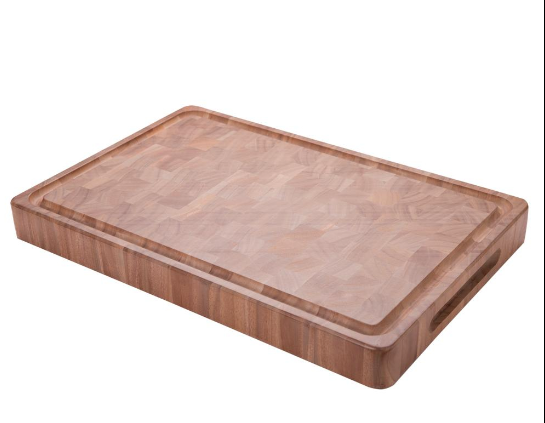

In [ ]:
# aqui podemos ver qual seria o objeto em questão
img